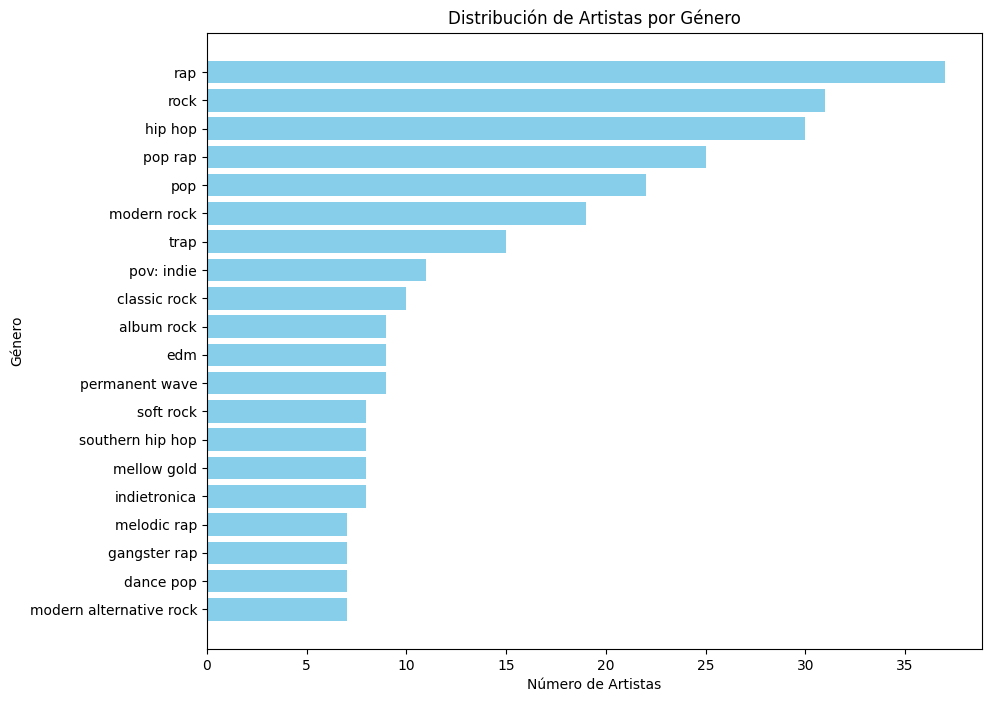

In [1]:
# Query to see how artists are distributed across genres
from py2neo import Graph
import matplotlib.pyplot as plt
# Connect to the Neo4j database
graph = Graph("bolt://neo4j:7687", auth=("neo4j", "password"))

# Ejecutando la consulta
query = """
MATCH (a:Artist)-[:HAS_GENRE]->(g:Genre)
RETURN g.name AS genre, count(distinct a) AS numberOfArtists
ORDER BY numberOfArtists DESC
LIMIT 20
"""
nodes = graph.run(query).data()

# Extrayendo los géneros y el número de artistas
genres = [node['genre'] for node in nodes]
num_artists = [node['numberOfArtists'] for node in nodes]

# Creando el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(genres, num_artists, color='skyblue')
plt.xlabel('Número de Artistas')
plt.ylabel('Género')
plt.title('Distribución de Artistas por Género')
plt.gca().invert_yaxis()  # Invertir el eje y para que los valores más altos aparezcan arriba
plt.show()


In [3]:
# Query to see how basic your playlist is based on artist popularity
query = """
MATCH (a:Artist)
WHERE a.popularity > 70
MATCH (t:Track)-[:PERFORMED_BY]->(a)
WITH COUNT(t) AS popular_songs
MATCH (all:Track)
WITH popular_songs, COUNT(*) AS total_songs
RETURN (popular_songs * 100.0) 
MATCH (a:Artist)
WITH a.popularity AS popularity
ORDER BY popularity
WITH COLLECT(popularity) AS popularity_list, COUNT(*) AS total_artists
"""
nodes = graph.run(query).data()

# Display the results
for node in nodes:
    print(node)

ClientError: [Statement.SyntaxError] Variable `a` not defined (line 9, column 6 (offset: 208))
"WITH a.popularity AS popularity"
      ^

In [ ]:
# Query to count genres in the top 50
query = """
MATCH (g:Genre)
WITH count(g) AS totalGenres
MATCH (g:Genre)
MATCH (tg:TopGenre)
WHERE g.name = tg.name
WITH totalGenres, count(g) AS matchingGenres
RETURN (toFloat(matchingGenres) / totalGenres) * 100 AS percentageOfTopGenre
"""
nodes = graph.run(query).data()

# Display the results
for node in nodes:
    print(node)

In [ ]:
# Query to count the number of songs common between Track and TopTrack nodes
query = """
MATCH (t:Track)
MATCH (tt:TopTrack)
WHERE t.name = tt.name
WITH count(t) AS matchingTracks
RETURN matchingTracks
"""
nodes = graph.run(query).data()

# Display the results
for node in nodes:
    print(node)